In [1]:
import numpy as np
import matplotlib.pyplot as plt

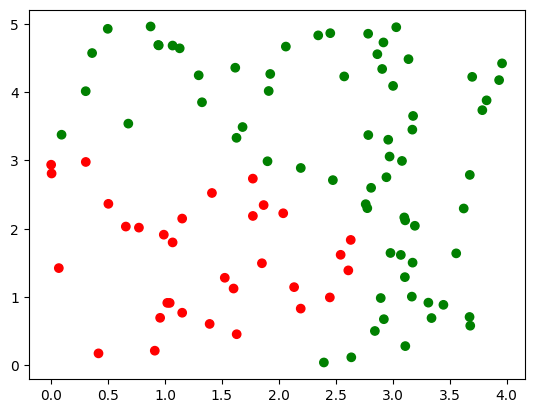

In [2]:
X = np.array(
    [[4.49304580e-03, 3.10114884e+00, 9.19728614e-02, 9.10559769e-01,
  1.77194109e+00, 1.86631298e+00, 2.03816047e+00, 2.78521382e+00,
  3.62312866e+00, 1.77147641e+00, 2.98006665e+00, 1.04143975e+00,
  4.97621272e-01, 4.95894063e-04, 2.19235886e+00, 2.76262288e+00,
  3.78652700e+00, 3.19415915e+00, 2.77647041e+00, 1.92436646e+00,
  2.19188753e+00, 1.29609373e+00, 3.67437968e+00, 1.15113148e+00,
  3.07085261e+00, 2.60987212e+00, 2.90706821e+00, 2.91819732e+00,
  3.03073124e+00, 2.34558543e+00, 2.54246461e+00, 3.10885639e+00,
  1.85125293e+00, 3.13827435e+00, 3.04832082e-01, 3.17201550e+00,
  3.55715787e+00, 9.45213774e-01, 2.57378471e+00, 1.91077293e+00,
  3.44487284e+00, 1.32503476e+00, 2.97218678e+00, 4.16347134e-01,
  3.95968538e+00, 2.06143030e+00, 2.89448566e+00, 2.80998346e+00,
  3.04025157e-01, 2.63597269e+00, 1.12927305e+00, 1.62812930e+00,
  3.68044723e+00, 3.17854308e+00, 3.67658480e+00, 3.16754960e+00,
  2.92198524e+00, 3.34041265e+00, 2.47422840e+00, 3.08099084e+00,
  1.60237636e+00, 2.86478626e+00, 3.10648306e+00, 2.45146328e+00,
  1.52518723e+00, 3.11018300e+00, 1.06675610e+00, 3.69761739e+00,
  9.41152466e-01, 1.62960292e+00, 1.15104074e+00, 3.31273086e+00,
  2.84302931e+00, 3.00291497e+00, 1.68130752e+00, 2.94437897e+00,
  9.89721883e-01, 1.39223653e+00, 8.73872947e-01, 5.03134073e-01,
  6.78107573e-01, 1.61718057e+00, 1.02035547e+00, 2.39530250e+00,
  6.56383691e-01, 2.78394696e+00, 3.60192734e-01, 1.41233628e+00,
  2.96020493e+00, 2.63106091e+00, 2.44763094e+00, 3.93388903e+00,
  7.71314182e-01, 2.13384158e+00, 6.79491973e-02, 3.82402177e+00,
  3.17421497e+00, 9.57494372e-01, 1.90035643e+00, 1.06704826e+00],
 [2.80849852e+00, 2.16538258e+00, 3.37584513e+00, 2.14716566e-01,
  2.18697514e+00, 2.34612977e+00, 2.22618213e+00, 3.37105734e+00,
  2.29610869e+00, 2.73319397e+00, 1.64492714e+00, 9.14060085e-01,
  4.92595815e+00, 2.93666583e+00, 2.88920747e+00, 2.35928221e+00,
  3.73534735e+00, 2.04295526e+00, 2.30081511e+00, 4.26512207e+00,
  8.30823962e-01, 4.24569653e+00, 7.08407436e-01, 7.70239593e-01,
  1.61649904e+00, 1.39017952e+00, 4.33820311e+00, 4.72662946e+00,
  4.94928888e+00, 4.83002030e+00, 1.61831645e+00, 2.12249770e+00,
  1.49466872e+00, 4.48189327e+00, 2.97720818e+00, 3.45017200e+00,
  1.63937735e+00, 4.68375524e+00, 4.22904917e+00, 4.01581769e+00,
  8.86098228e-01, 3.85084834e+00, 3.05623996e+00, 1.75446638e-01,
  4.42023893e+00, 4.66608918e+00, 9.85348658e-01, 2.59873897e+00,
  4.01301453e+00, 1.17768419e-01, 4.64047688e+00, 3.33049012e+00,
  5.80396474e-01, 3.65063728e+00, 2.78764925e+00, 1.00608209e+00,
  6.75818914e-01, 6.92330675e-01, 2.71130376e+00, 2.99208715e+00,
  1.12465998e+00, 4.55439158e+00, 1.29137856e+00, 4.86224481e+00,
  1.28212131e+00, 2.82086389e-01, 4.68098804e+00, 4.22287722e+00,
  4.68946217e+00, 4.55874949e-01, 2.14856525e+00, 9.17885752e-01,
  5.03205847e-01, 4.09042583e+00, 3.48834951e+00, 2.75368565e+00,
  1.91273582e+00, 6.06522046e-01, 4.96021621e+00, 2.36438268e+00,
  3.53834154e+00, 4.35665003e+00, 9.14621245e-01, 4.22063434e-02,
  2.03164334e+00, 4.85402502e+00, 4.57115133e+00, 2.52300403e+00,
  3.30244909e+00, 1.83602529e+00, 9.94399827e-01, 4.17527897e+00,
  2.01606061e+00, 1.14493486e+00, 1.42371262e+00, 3.87913175e+00,
  1.50348120e+00, 6.95846363e-01, 2.98744658e+00, 1.79954060e+00]]
)

Y = np.array([5.88038891e-02, 9.99844336e-01, 9.99965440e-01, 1.33507916e-02,
 3.59713143e-05, 1.53234419e-04, 2.36139986e-04, 9.99999999e-01,
 1.00000000e+00, 6.20464761e-03, 9.94958104e-01, 1.96575817e-04,
 1.00000000e+00, 3.83176183e-01, 6.39056496e-01, 8.99134504e-01,
 1.00000000e+00, 9.99981291e-01, 8.85926155e-01, 1.00000000e+00,
 2.14072360e-02, 1.00000000e+00, 1.00000000e+00, 4.45247569e-04,
 9.99494996e-01, 2.05277818e-01, 1.00000000e+00, 1.00000000e+00,
 1.00000000e+00, 1.00000000e+00, 3.93050267e-02, 9.99849074e-01,
 4.76666004e-05, 1.00000000e+00, 4.09892899e-01, 1.00000000e+00,
 1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
 1.00000000e+00, 1.00000000e+00, 9.99999947e-01, 4.66530154e-02,
 1.00000000e+00, 1.00000000e+00, 9.98105903e-01, 9.95725161e-01,
 1.00000000e+00, 9.97805708e-01, 1.00000000e+00, 9.99373102e-01,
 1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.99997560e-01,
 9.99849384e-01, 9.99999998e-01, 7.53165184e-01, 9.99999986e-01,
 8.97802824e-05, 1.00000000e+00, 9.99939575e-01, 1.00000000e+00,
 3.19166448e-05, 9.99999843e-01, 1.00000000e+00, 1.00000000e+00,
 1.00000000e+00, 5.60848604e-03, 9.12802552e-06, 9.99999980e-01,
 9.99704857e-01, 1.00000000e+00, 9.99996561e-01, 9.99971551e-01,
 5.92033108e-06, 1.34945852e-03, 1.00000000e+00, 9.95226171e-05,
 9.99999332e-01, 1.00000000e+00, 2.00309551e-04, 9.40467571e-01,
 1.33831383e-05, 1.00000000e+00, 1.00000000e+00, 1.50198182e-04,
 1.00000000e+00, 1.16436225e-01, 1.45852849e-01, 1.00000000e+00,
 1.00110637e-05, 1.91286188e-03, 1.11198745e-04, 1.00000000e+00,
 9.99977017e-01, 8.48035886e-04, 5.27387174e-01, 5.35325389e-06])

plt.scatter(X[0], X[1], c=np.where(Y <= 0.5, 'red', 'green'))
plt.show()

degree = 6
thetas_count = (degree - 1)*len(X) + 1

In [3]:
def sigmoid(theta, x):
    return 1/(1+np.exp(-theta.dot(x.transpose())))

def cost(theta, X, Y):
    return (Y - sigmoid(theta, X))/len(Y)

def logistic_regression(X, Y, l, iterations):
    theta = np.ones(thetas_count)

    for k in range(iterations):
        theta = theta + l*cost(theta, X, Y).dot(X)
    return theta


In [4]:
powers = np.arange(1, degree)
X_powers = X[:,:, None]**powers
transposed = X_powers.transpose(1,0,2).reshape(X_powers.shape[1], -1, order='F')
X_final = np.insert(transposed, 0, 1, axis=1)

In [5]:
def predict(X):
    powers = np.arange(1, degree)
    X_powers = X[:,:, None]**powers
    transposed = X_powers.transpose(1,0, 2).reshape(X_powers.shape[1], -1, order='F')
    X_final = np.insert(transposed, 0, 1, axis=1)

    return sigmoid(theta, X_final)

In [6]:
theta =  logistic_regression(X_final, Y, 0.0001, 5000000)

Y_predict = predict(X)

In [7]:
num_samples = 100

X_test = np.array([
    np.random.uniform(0, 4, num_samples),
    np.random.uniform(0, 5, num_samples)
])

Y_test_predict = predict(X_test)

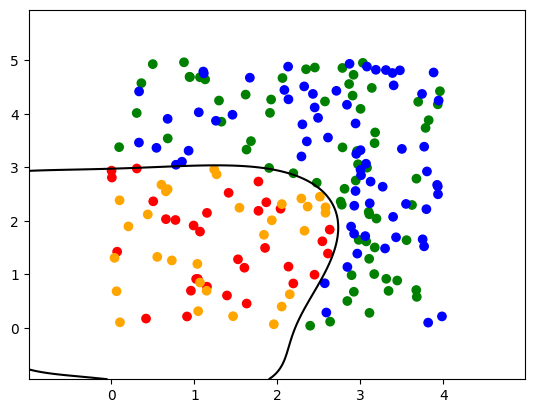

In [9]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

x_min, x_max = min(X[0,:].min(), X_test[0,:].min()) - 1, max(X[0,:].max(), X_test[0,:].max()) + 1
y_min, y_max = min(X[1,:].min(), X_test[1,:].min()) - 1, max(X[1,:].max(), X_test[1,:].max()) + 1
h = .02

xx, yy = meshgrid(arange(x_min, x_max, h), arange(y_min, y_max, h))


grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = predict(grid_points.T.reshape(2, -1))


Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0.5], colors='black')

plt.scatter(X[0], X[1], c=np.where(Y_predict <= 0.5, 'red', 'green'))

plt.scatter(X_test[0], X_test[1], c=np.where(Y_test_predict <= 0.5, 'orange', 'blue'))

plt.show()